In [1]:
import os
from os import path
import sys
sys.path.append('../')

import modules.channel.channelFlows as cf
import utilities as uti

figDir = os.path.join(os.getcwd(), 'figures')
data_dir = os.path.join(os.getcwd(), '../../dat/')

if not path.exists(data_dir):
    os.mkdir(data_dir)

S = [1e-8, 1e-6, 1e-4, 1e-2, 1e-0, 1e2]
S = ['{:1.0e}'.format(s) for s in S]

print("Comparing data for " + str(S))
N = 20
tol_py  = 1e-15
eps_py  = tol_py*5
tol_cpp = 1e-40
eps_cpp = 1e-40

sign_digits = 20
str_width = sign_digits + 2 # the 2 is the length of "1." in 1.431...

# create python coeffs
coeffs = {"python":{}, "cpp":{}}

for s in S:
    # compute coeffs
    start_coeffs = cf.StartupCoefficients_scaled()
    Kn = start_coeffs.Kn(float(s), N, tol_py, eps_py)
    An = start_coeffs.An(float(s), Kn) # depends on Kn
    coeffs["python"][s] = (Kn, An)
    
    # write to file
    format_str = '{0:>#'+ str(str_width) + '.' + str(sign_digits) + 'e}'
 
    filePath = os.path.join(os.getcwd(), '../../dat/', 'coeffs_python_' + str(s) + '.csv')
    with open(filePath,'w') as f:
        for kn, an, n in zip(Kn,An,range(1,N+1)):
            coeff_str = str(format_str.format(kn)) + ',' + str(format_str.format(an)) + '\n'
            f.write(coeff_str)
     
# create files
bin_startFlow =  os.path.join(os.getcwd(), '../../bin/startFlow')
for s in S:
    fileName = "coeffs_cpp_" + str(s) + ".csv" 
    uti.compute_cpp_start_coeffs(bin_startFlow, float(s), float(s), N, tol_cpp, fileName)
    
# compute rel and abs errors
for s in S:
    bin_path = os.getcwd() + '''/../../bin/compCoeffs'''
    python_path = data_dir + "coeffs_python_" + str(s) + ".csv"
    cpp_path = data_dir + "coeffs_cpp_" + str(s) + ".csv"
    rel_path = data_dir + "rel_error_" + str(s) + ".csv"
    abs_path = data_dir + "abs_error_" + str(s) + ".csv"
    uti.compute_errors(bin_path, python_path, cpp_path, rel_path, abs_path)

Comparing data for ['1e-08', '1e-06', '1e-04', '1e-02', '1e+00', '1e+02']

Starting startFlow.
digits10: 50
Writing output to: /home/local/CSI/sr31nyqu/start-up-flow/python/notebooks/../../dat/coeffs_cpp_1e-08.csv

Setup: 
Sp: 1e-08  Sm: 1e-08  tol: 1e-40  N: 20  

k: 1.5707963110869335083619878999480286972655135579707
k: 3.1415926221738670167239835514649174067213534385771
k: 4.7123889332608005250859947061195261405346930594191
k: 6.2831852443477340334480291154807149108270131111809
k: 7.8539815554346675418100945311173437296507683340203
k: 9.4247778665216010501721987045982726089668837594027
k: 10.995574177608534558534349387492361560621169040488
k: 12.566370488695468066896554331368470596321886821391
k: 14.137166799782401575258821287795459727616816214439
k: 15.707963110869335083621158008342188965869811385416
k: 17.278759421956268591983572244577518322238369922827
k: 18.849555733043202100346071748070307807650407805431
k: 20.420352044130135608708664270389417432781395006928
k: 21.9911483552170

k: 1.5706392628699011697892860422291332334370496721598
k: 3.1412785257475508083226337716397428395616145159895
k: 4.7119177886406973820507166688393694106798914846225
k: 6.2825570515570893528374334982094872918270733162629
k: 7.8531963145044751756665251920946410498392009560344
k: 9.4238355774906032963481968257476231240123864602981
k: 10.994474840523222149225746379938435851714496283693
k: 12.565114103610080154882201988125406350247189758233
k: 14.135753366758925717846969365075104385183244843789
k: 15.706392629977507224302491113803651391341917185864
k: 17.277031893273573039790919607695603266726381735187
k: 18.84767115665487150692080514463784046853971725917
k: 20.418310420129150943073801069984806345444224998015
k: 21.988949683704159638111387565147998588341950256265
k: 23.55958894738764585208161579857683922515905769378
k: 25.130228211187357812925874135869925780624963487885
k: 26.700867475111043714185678105725200132276872118933
k: 28.271506739166451712709485818404762286510058141886
k: 29.842146

k: 0.86033358901937976248389342413766233341188402385326
k: 2.0287578381104342235769711247347143761084097294416
k: 3.4256184594817281464777138621854561776964192615591
k: 4.9131804394348836888378206685945355668476147518922
k: 6.4372981791719471203626398510256332453217337333423
k: 7.9786657124132407552457812070142179206111596758561
k: 9.529334405361963602968471794332704251695799148786
k: 11.085538406497022543376124600405453417220032246665
k: 12.645287223856643103849970647440453078189437559109
k: 14.20743672519118835976850214959254019523572426893
k: 15.771284874815882046871905320175473185292818732139
k: 17.336377923983360670860109208643795374168870342801
k: 18.902409956860024150822527025673469990185728176839
k: 20.469167402740949874351294523422826146569826005441
k: 22.036496727938565082924819287158233296234069986286
k: 23.604284772980408169148778348898885765237909847273
k: 25.17244632664666471360226933770435495671363519078
k: 26.740916014787309472627166156017574010498458065775
k: 28.309642

In [2]:
errors = {'abs':{}, 'rel':{}}
for s in S:
    abs_name = data_dir + "abs_error_" + str(s) + ".csv"
    rel_name = data_dir + "rel_error_" + str(s) + ".csv"
    
    abs_error = uti.read_coeffs(abs_name)
    rel_error = uti.read_coeffs(rel_name)
    
    errors['abs'][s] = abs_error
    errors['rel'][s] = rel_error

# Figure 3

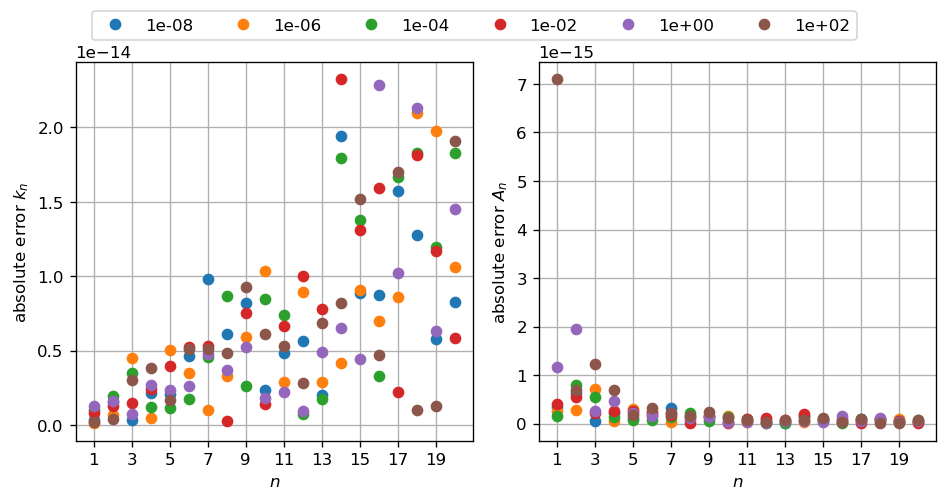

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

# n coefficients -> indices for the kn and an
n = range(1,len(abs_error['Kn'])+1)

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(120)
fig.set_tight_layout(True)
fig.set_size_inches(8, 4)

ax1.grid()
ax1.set_xlabel('$n$')
ax1.set_ylabel('absolute error $k_n$')
ax1.set_xticks(n[0::2])
for s in S:
    ax1.plot(n, errors['abs'][s]['Kn'], linestyle='', marker='o', label='Kn')

ax2.grid()
ax2.set_xlabel('$n$')
ax2.set_ylabel('absolute error $A_n$')
ax2.set_xticks(n[0::2]);

for s in S:
    ax2.plot(n, errors['abs'][s]['An'], linestyle='', marker='o', label=s )
    
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol=6, bbox_to_anchor=(0.5,1.05));

fig.savefig(os.path.join(figDir, 'absErrors.pdf'), bbox_inches='tight')

# Figure 4

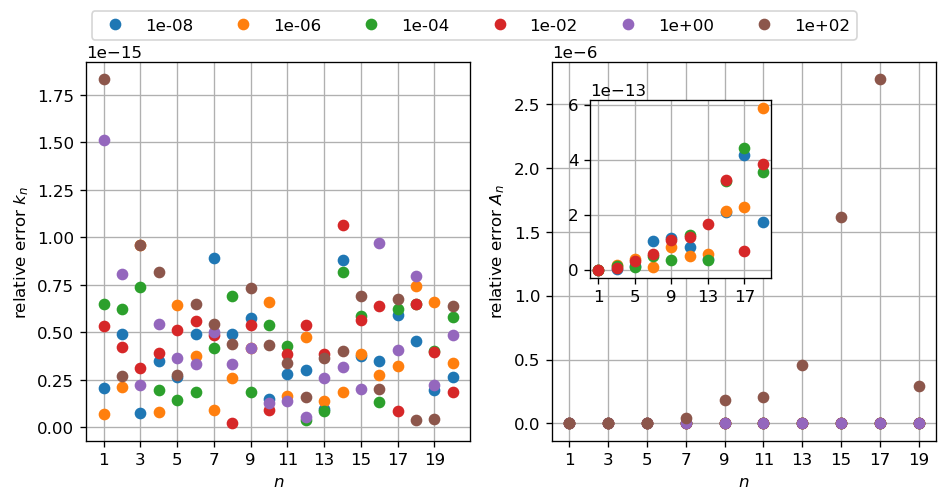

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import ticker 

# n coefficients -> indices for the kn and an
n = range(1,len(abs_error['Kn'])+1)

# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_dpi(120)
fig.set_tight_layout(True)
fig.set_size_inches(8, 4)

ax1.grid()
ax1.set_xlabel('$n$')
ax1.set_ylabel('relative error $k_n$')
ax1.set_xticks(n[0::2])
for s in S:
    ax1.plot(n, errors['rel'][s]['Kn'], linestyle='', marker='o', label=s)

ax2.grid()
ax2.set_xlabel('$n$')
ax2.set_ylabel('relative error $A_n$')
ax2.set_xticks(n[0::2])

# inset axes....
axins = ax2.inset_axes([0.1, 0.43, 0.47, 0.47])
for s in S[0:-2]:
    axins.plot(n[0::2], errors['rel'][s]['An'][0::2], linestyle='', marker='o', label=s)
axins.grid()
axins.set_xticks(n[0::4])

for s in S:
    ax2.plot(n[0::2], errors['rel'][s]['An'][0::2], linestyle='', marker='o', label=s)
    
# setting to ScalarFormatter to force powerlimits
formatter = ticker.ScalarFormatter()
formatter.set_powerlimits((-3,4))
ax2.yaxis.set_major_formatter(formatter)

# legend and saving
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center', ncol=6, bbox_to_anchor=(0.5,1.05));
fig.savefig(os.path.join(figDir, 'relErrors.pdf'), bbox_inches='tight')